# PROJECT NAME : EMAIL SPAM DETECTION
    CODERS CAVE INTERNSHIP 
    KOKKU NARESH
     

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

In [2]:
data=pd.read_csv("C://Users//N-A-N-I//Desktop//CIP//PR-2//SPAM EMAIL//spam_ham_dataset.csv")

In [3]:
data

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [4]:
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [6]:
data.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [7]:
data.isnull().sum ()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [8]:
data.drop('Unnamed: 0', axis=1, inplace = True)


In [9]:
data.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [10]:
data.isna().sum()

label        0
text         0
label_num    0
dtype: int64

In [11]:
data.shape

(5171, 3)

In [12]:
import nltk

In [13]:
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

In [14]:
stop_words = set(stopwords.words('english')) 

data['text'] = data['text'].apply(lambda x: ' '.join([ word for word in word_tokenize(x)  if not word in stop_words]))

In [15]:
X = data.loc[:, 'text']
y =data.loc[:, 'label_num'].values

In [16]:
X[1]

'Subject : hpl nom january 9 , 2001 ( see attached file : hplnol 09 . xls ) - hplnol 09 . xls'

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(X).toarray()

In [18]:
X[1]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [20]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [21]:
y_pred = classifier.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm1 = confusion_matrix(y_test, y_pred)

In [23]:
print('Accuracy: ', accuracy_score(y_test, y_pred) * 100)

Accuracy:  95.8118556701031


In [24]:
 import matplotlib.pyplot as plt

<AxesSubplot:>

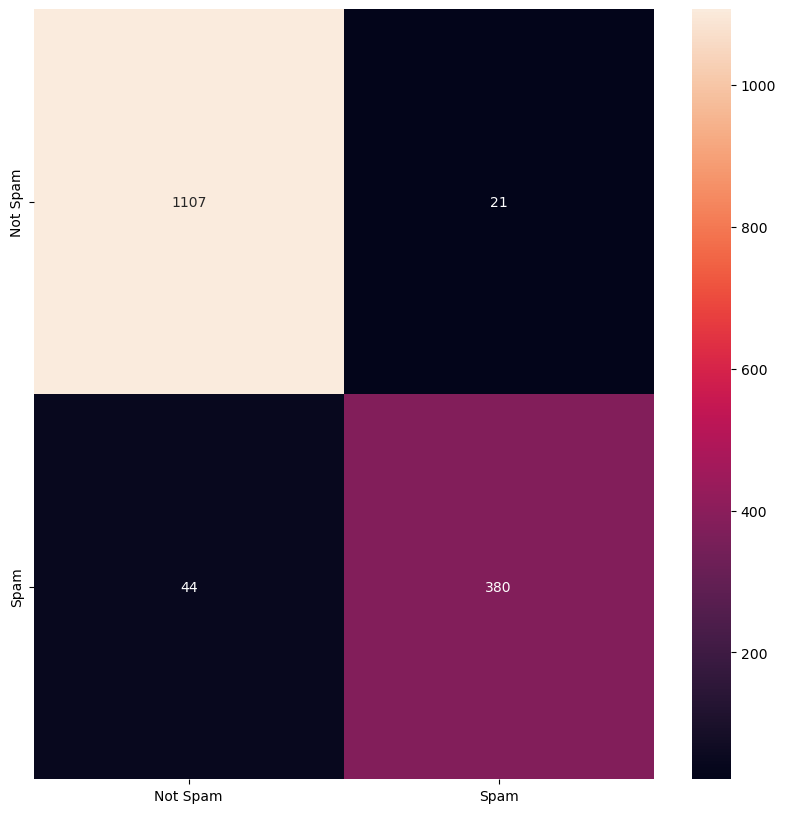

In [25]:
import seaborn as sns
plt.figure(figsize = (10, 10))
sns.heatmap(cm1,annot = True, fmt="n", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])

In [26]:
from sklearn.ensemble import RandomForestClassifier
nani=RandomForestClassifier()
nani.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
y_pred = nani.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score
nani2= confusion_matrix(y_test, y_pred)
print('Accuracy: ', accuracy_score(y_test, y_pred) * 100)

Accuracy:  97.80927835051546
